# **Overview**

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this Kaggle playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

## **Goal**

* To predict the sales price for each house. For each **`Id`** in the test set, we must predict the value of the **`SalePrice`** variable. 

## Data Description

Here's a brief version of what you'll find in the data description file.

* **SalePrice**: The property's sale price in dollars. This is the target variable that we're trying to predict.
* **MSSubClass**: The building class.
* **MSZoning**: The general zoning classification.
* **LotFrontage**: Linear feet of street connected to property.
* **LotArea**: Lot size in square feet.
*  **Street**: Type of road access.
*  **Alley**: Type of alley access.
*  **LotShape**: General shape of property.
*  **LandContour**: Flatness of the property.
*  **Utilities**: Type of utilities available.
*  **LotConfig**: Lot configuration.
*  **LandSlope**: Slope of property.
*  **Neighborhood**: Physical locations within Ames city limits.
*  **Condition1**: Proximity to main road or railroad.
*  **Condition2**: Proximity to main road or railroad (if a second is present).
*  **BldgType**: Type of dwelling.
*  **HouseStyle**: Style of dwelling.
*  **OverallQual**: Overall material and finish quality
*  **OverallCond**: Overall condition rating.
*  **YearBuilt**: Original construction date.
*  **YearRemodAdd**: Remodel date.
*  **RoofStyle**: Type of roof.
*  **RoofMatl**: Roof material.
*  **Exterior1st**: Exterior covering on house.
*  **Exterior2nd**: Exterior covering on house (if more than one material).
*  **MasVnrType**: Masonry veneer type.
*  **MasVnrArea**: Masonry veneer area in square feet.
*  **ExterQual**: Exterior material quality.
*  **ExterCond**: Present condition of the material on the exterior.
*  **Foundation**: Type of foundation.
*  **BsmtQual**: Height of the basement.
*  **BsmtCond**: General condition of the basement.
*  **BsmtExposure**: Walkout or garden level basement walls.
*  **BsmtFinType1**: Quality of basement finished area.
*  **BsmtFinSF1**: Type 1 finished square feet.
*  **BsmtFinType2**: Quality of second finished area (if present).
*  **BsmtFinSF2**: Type 2 finished square feet.
*  **BsmtUnfSF**: Unfinished square feet of basement area.
*  **TotalBsmtSF**: Total square feet of basement area.
*  **Heating**: Type of heating.
*  **HeatingQC**: Heating quality and condition.
*  **CentralAir**: Central air conditioning.
*  **Electrical**: Electrical system.
*  **1stFlrSF**: First Floor square feet.
*  **2ndFlrSF**: Second floor square feet.
*  **LowQualFinSF**: Low quality finished square feet (all floors).
*  **GrLivArea**: Above grade (ground) living area square feet.
*  **BsmtFullBath**: Basement full bathrooms.
*  **BsmtHalfBath**: Basement half bathrooms.
*  **FullBath**: Full bathrooms above grade.
*  **HalfBath**: Half baths above grade.
*  **Bedroom**: Number of bedrooms above basement level.
*  **Kitchen**: Number of kitchens.
*  **KitchenQual**: Kitchen quality.
*  **TotRmsAbvGrd**: Total rooms above grade (does not include bathrooms).
*  **Functional**: Home functionality rating.
*  **Fireplaces**: Number of fireplaces.
*  **FireplaceQu**: Fireplace quality.
*  **GarageType**: Garage location.
*  **GarageYrBlt**: Year garage was built.
*  **GarageFinish**: Interior finish of the garage.
*  **GarageCars**: Size of garage in car capacity.
*  **GarageArea**: Size of garage in square feet.
*  **GarageQual**: Garage quality.
*  **GarageCond**: Garage condition.
*  **PavedDrive**: Paved driveway.
*  **WoodDeckSF**: Wood deck area in square feet.
*  **OpenPorchSF**: Open porch area in square feet.
*  **EnclosedPorch**: Enclosed porch area in square feet.
*  **3SsnPorch**: Three season porch area in square feet.
*  **ScreenPorch**: Screen porch area in square feet.
*  **PoolArea**: Pool area in square feet.
*  **PoolQC**: Pool quality.
*  **Fence**: Fence quality.
*  **MiscFeature**: Miscellaneous feature not covered in other categories.
*  **MiscVal**: $Value of miscellaneous feature.
*  **MoSold**: Month Sold.
*  **YrSold**: Year Sold.
*  **SaleType**: Type of sale.
*  **SaleCondition**: Condition of sale.

---------------

## Import Liberaries

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import KNNImputer

from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
import sklearn.metrics as metrics

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

## Load Data

There are two main datasets: the `train` dataset, which we will be working on to train our models, and the `test` dataset, which we will use to evaluate our models. Finally, there is sample submission, which we will refer to when we submit our solution.

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

## Exploratory Data Analysis (EDA) and Visualization

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.shape

(1460, 81)

* Our training data contains **`1460`** rows, **`79`** features and the target variable **`SalePrice`**.

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

### House Price Distribution

In [7]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<Axes: xlabel='SalePrice', ylabel='Density'>

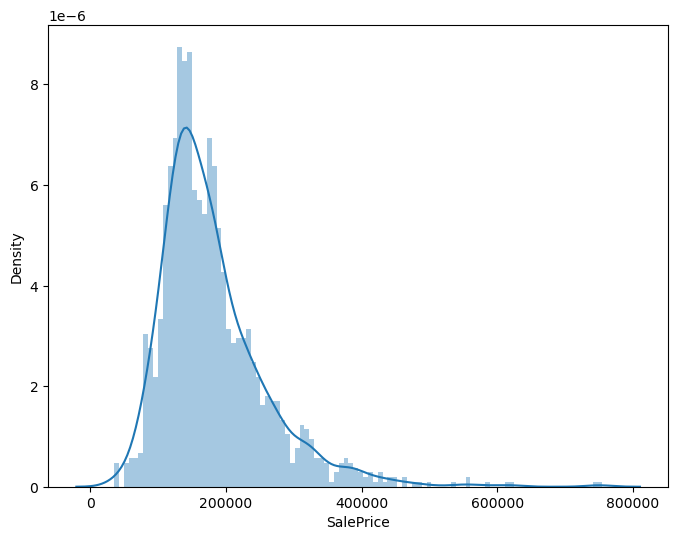

In [8]:
plt.figure(figsize=(8,6))
sns.distplot(train['SalePrice'], hist_kws=({'alpha':0.4}), bins=100)

* The **`House Price`** distribution is right skewed, which indicates that most house prices are in a lower to middle range and a few houses are significantly more.
* The **`House Price`** mean is **`180,921$`** and **`75%`** of house prices are below **`214,000$`**.

In [9]:
# separating numeric cols
list(set(train.dtypes.tolist()))

[dtype('float64'), dtype('int64'), dtype('O')]

In [10]:
# train data 
train_num = train.select_dtypes(['int64','float64'])

#test data
test_num = test.select_dtypes(['int64','float64'])

train_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

* We have **`37`** numeric columns, **`34`** of them are of type **`int64`** including our target variable **`SalePrice`** and **`3`** columns are of type **`float64`**. 

In [11]:
# categorical features
# train data
train_cat = train.select_dtypes('object')

# test data
test_cat = test.select_dtypes('object')

train_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Alley          91 non-null     object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     588 non-null    object
 18  ExterQual      1460 non-null

In [12]:
# check unique values in categorical features
train_cat.nunique()

MSZoning          5
Street            2
Alley             2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        3
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
PoolQC            3
Fence             4
MiscFeature       4
SaleType          9
SaleCondition     6
dtype: int64

-----------

## Model Preparation

* Our Dataset contains **43** non-numerical variables and **37** numerical variables. To prepare this dataset for modeling, we will convert the non-numeric variables into numerical format and dealing with missing values in the numerical variables.

### Training Data

* #### Missing Values

In [14]:
# identify columns with missing values
missing_values_cols = train_num.columns[train_num.isna().any()]
missing_values_cols

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

In [15]:
# Number of missing values in each column
missing_values = train_num[missing_values_cols].isna().sum()
missing_values

LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64

In [16]:
# filling the missing values using knn imputer
imputer = KNNImputer(n_neighbors=5)
train_numeric = imputer.fit_transform(train_num)

In [17]:
# the result of the imputer is a numpy array, so we will convert it back to a data frame
train_numeric = pd.DataFrame(train_numeric, columns= train_num.columns)
train_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1.0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,150.0,856.0,856.0,854.0,0.0,1710.0,1.0,0.0,2.0,1.0,3.0,1.0,8.0,0.0,2003.0,2.0,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500.0
1,2.0,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,284.0,1262.0,1262.0,0.0,0.0,1262.0,0.0,1.0,2.0,0.0,3.0,1.0,6.0,1.0,1976.0,2.0,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,181500.0
2,3.0,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,434.0,920.0,920.0,866.0,0.0,1786.0,1.0,0.0,2.0,1.0,3.0,1.0,6.0,1.0,2001.0,2.0,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,223500.0
3,4.0,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,540.0,756.0,961.0,756.0,0.0,1717.0,1.0,0.0,1.0,0.0,3.0,1.0,7.0,1.0,1998.0,3.0,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,140000.0
4,5.0,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,490.0,1145.0,1145.0,1053.0,0.0,2198.0,1.0,0.0,2.0,1.0,4.0,1.0,9.0,1.0,2000.0,3.0,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,250000.0


------------

* #### Categorical Features Encoding

In [20]:
# apply Label encoding to categorical features

cat_features = train.select_dtypes('object').columns.tolist()

encoder = LabelEncoder()
train_cat_encoded = train_cat.apply(encoder.fit_transform)

#label_df = pd.DataFrame(label_encoded)
train_encoded = pd.concat([train_numeric, train_cat_encoded], axis=1)

# finally we drop id column
train_encoded = train_encoded.drop('Id', axis=1)


In [21]:
train_encoded.shape

(1460, 80)

--------------

### Test Data

* #### Missing Values

In [22]:
# identify columns with missing values
missing_values_tcols = test_num.columns[test_num.isna().any()]
missing_values_tcols

Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars', 'GarageArea'],
      dtype='object')

In [23]:
# Number of missing values in each column
missing_tvalues = test_num[missing_values_tcols].isna().sum()
missing_tvalues

LotFrontage     227
MasVnrArea       15
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
GarageYrBlt      78
GarageCars        1
GarageArea        1
dtype: int64

In [24]:
# filling the missing values using knn imputer
imputer = KNNImputer(n_neighbors=5)
test_numeric = imputer.fit_transform(test_num)

In [25]:
# the result of the imputer is a numpy array, so we will convert it back to a data frame
test_numeric = pd.DataFrame(test_numeric, columns= test_num.columns)
test_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461.0,20.0,80.0,11622.0,5.0,6.0,1961.0,1961.0,0.0,468.0,144.0,270.0,882.0,896.0,0.0,0.0,896.0,0.0,0.0,1.0,0.0,2.0,1.0,5.0,0.0,1961.0,1.0,730.0,140.0,0.0,0.0,0.0,120.0,0.0,0.0,6.0,2010.0
1,1462.0,20.0,81.0,14267.0,6.0,6.0,1958.0,1958.0,108.0,923.0,0.0,406.0,1329.0,1329.0,0.0,0.0,1329.0,0.0,0.0,1.0,1.0,3.0,1.0,6.0,0.0,1958.0,1.0,312.0,393.0,36.0,0.0,0.0,0.0,0.0,12500.0,6.0,2010.0
2,1463.0,60.0,74.0,13830.0,5.0,5.0,1997.0,1998.0,0.0,791.0,0.0,137.0,928.0,928.0,701.0,0.0,1629.0,0.0,0.0,2.0,1.0,3.0,1.0,6.0,1.0,1997.0,2.0,482.0,212.0,34.0,0.0,0.0,0.0,0.0,0.0,3.0,2010.0
3,1464.0,60.0,78.0,9978.0,6.0,6.0,1998.0,1998.0,20.0,602.0,0.0,324.0,926.0,926.0,678.0,0.0,1604.0,0.0,0.0,2.0,1.0,3.0,1.0,7.0,1.0,1998.0,2.0,470.0,360.0,36.0,0.0,0.0,0.0,0.0,0.0,6.0,2010.0
4,1465.0,120.0,43.0,5005.0,8.0,5.0,1992.0,1992.0,0.0,263.0,0.0,1017.0,1280.0,1280.0,0.0,0.0,1280.0,0.0,0.0,2.0,0.0,2.0,1.0,5.0,0.0,1992.0,2.0,506.0,0.0,82.0,0.0,0.0,144.0,0.0,0.0,1.0,2010.0


---------

* #### Categorical Features Encoding

In [26]:
# apply Label encoding to categorical features
cat_features_test = test.select_dtypes('object').columns.tolist()

encoder2 = LabelEncoder()
test_cat_encoded = test_cat.apply(encoder2.fit_transform)

test_encoded = pd.concat([test_numeric, test_cat_encoded], axis=1)

# finally we drop id column
test_encoded = test_encoded.drop('Id', axis=1)

In [27]:
test_encoded.shape

(1459, 79)

### Splitting the training dataset

* We will split the data into **X** independent features and **Y** target variable, then we will apply feature scaling to the independent features to handle highly varying values between numerical and encoded features, as machine learning algorithms tend to use greater values as higher and smaller values as lower regardless of the unit of the value.
* We will use the log value of the target variable **Y** instead of its actual value to avoid bias and make sure that the errors in predicting high values and lower values will affect the results equally.

In [28]:
list(set(train_encoded.dtypes.tolist()))

[dtype('int32'), dtype('float64')]

In [29]:
x = train_encoded.drop('SalePrice', axis=1)
y = train_encoded['SalePrice']

# standardizing the independent features 
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# using the log value of the target valriable
y_scaled = [np.log(i+1) for i in y]


In [30]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.25, random_state=0)

### Model Building

#### 1. Linear Regression

* The train data set contains **79** features, which is a lot, since we don't know how strongly correlated independent features are, we will use **Lasso Regression** which can be beneficial with high collinearity and high dimensional data in terms of dimensionality reduction, feature selection and generalization.

#### 1.1 Base Model

In [31]:
# initialize the lasso model
lasso = linear_model.Lasso(alpha=1)

# fit the model with training data
lasso.fit(x_train,y_train)

# predict on the test set
y_pred = lasso.predict(x_test)

# evaluate the model
rmse = metrics.root_mean_squared_error(y_test,y_pred)
rmse

0.3857067839034436

#### 1.2 Hyperparameter Tuning

* We will use **Cross Validation** to test multiple values for **alpha** (the regularization parameter in Lasso Regression) to get optimal model performance.

In [32]:
# Define the range of alpha to be tested
alpha_range = [.01, 0.1, 1, 10, 100]

# Set up Grid Search
lasso_cv = GridSearchCV(lasso, param_grid={'alpha': alpha_range}, cv=5)
lasso_cv.fit(x_train, y_train)

# Best alpha value
best_params = lasso_cv.best_params_
best_params


{'alpha': 0.01}

In [33]:
lasso_coef = lasso_cv.best_estimator_.coef_
lasso_coef

array([-0.00280167,  0.01602436,  0.01412575,  0.10683445,  0.03356123,
        0.04586846,  0.02074071,  0.        ,  0.02351527,  0.        ,
       -0.        ,  0.0358071 ,  0.00635727,  0.        , -0.        ,
        0.11724344,  0.01131906,  0.        ,  0.00256499,  0.        ,
        0.        , -0.00021085,  0.00277954,  0.02341224,  0.        ,
        0.02628   ,  0.01618224,  0.00778463,  0.        , -0.        ,
        0.        ,  0.00461987,  0.        , -0.        , -0.        ,
       -0.        , -0.        ,  0.0035293 ,  0.        , -0.00463591,
        0.        , -0.        , -0.        ,  0.        ,  0.        ,
        0.        , -0.00142577, -0.0051794 ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.        ,
        0.        ,  0.00361166, -0.01457274,  0.        , -0.        ,
       -0.00316179, -0.        , -0.        , -0.00764373,  0.02042623,
        0.        , -0.01181691,  0.00821528, -0.        , -0.00

* A lot of coefficients are zero, meaning that our **Lasso Model** has determined those features aren't contributing much to the prediction.

#### 1.3 Optimal Lasso Regression Model

In [34]:
# We will use our tuned alpha parameter to train our final model
final_lasso = linear_model.Lasso(alpha=0.01)

# Fit training data to the final model
final_lasso.fit(x_train,y_train)

# Predict y values
y_pred_final = final_lasso.predict(x_test)

# Evaluate final model
final_rmse = metrics.root_mean_squared_error(y_test, y_pred_final)
final_rmse

0.18172955742405575

#### 1.4 Feature Importance

In [35]:
import eli5
eli5.show_weights(final_lasso, top=10, feature_names= x.columns.tolist())

Weight?,Feature
+12.025,<BIAS>
+0.117,GrLivArea
+0.107,OverallQual
+0.046,YearBuilt
+0.036,TotalBsmtSF
+0.034,OverallCond
+0.026,GarageCars
+0.024,BsmtFinSF1
+0.023,Fireplaces
+0.021,YearRemodAdd


* Although our Dataset contains **79** features, a few is contributing to the price of the house. According to feature importance graph, the **GrLivArea** (Above grade (ground) living area square feet) is the most dominant feature in determining house price by a fair distance from its nearest one, the **OverallQual** (Overall material and finish quality).
* Other features like **TotalBsmtSF** (Total square feet of basement area), **YearBuilt** (Original construction date) and **OverallCond** (Overall condition rating) also contribute to the price.

-------

### 2. Random Forest Regressor

* Now we will build another model using **Random Forest** technique which leverages the concept of bagging and feature randomness to enhance predictions and reduce overfitting. This technique work effectively with high-dimensional data that contains a large number of features. (which is the case here)
* We then will compare the two models on our chosen metric (**Root-Mean-Squared-Error**) and select the best predictor.

#### 2.1 Base Model

In [36]:
# Initialize the Random Forest Model
rf = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)

# Fit the Model
rf.fit(x_train,y_train)

# Predict y
rf_pred = rf.predict(x_test)

# Evaluate the Model
rf_rmse = metrics.root_mean_squared_error(y_test,rf_pred)
oob_score = rf.oob_score_

print('Root Mean Squared Error :', rf_rmse)
print('Out of Bag Score :', oob_score)

Root Mean Squared Error : 0.1465674729026628
Out of Bag Score : -8.086704905698358


* Although the **Random Forest** model's score of the evaluation metric(**RMSE**) is better than the score of the **Tuned Lasso** model, the out-of-bag (**OOB**) score is negative, which means that the model's predictions on the OOB data are on-average worse than simply predicting the mean of the target variable for all data points.

#### 2.2 Hyperparameter Tuning

In [38]:
params = {'n_estimators': [100,150,250,300],
          'max_features': ['log2', None],
          'max_depth': [10,20,30,35,40,50,None],
          'max_leaf_nodes': [1,2,None],
          'min_samples_split': [2,5]
         }
scoring = ['neg_root_mean_squared_error']

rf_cv = GridSearchCV (rf, param_grid = params, scoring = scoring, cv=5, refit='neg_root_mean_squared_error')

#rf_cv.fit(x_train,y_train)

rf_best_params = rf_cv.best_params_

In [39]:
# Safe the cross validation model
import joblib
joblib.dump(rf_cv,'random forest cv.pkl')

['random forest cv.pkl']

In [40]:
rf_best_params

{'max_depth': 20,
 'max_features': 'log2',
 'max_leaf_nodes': None,
 'min_samples_split': 5,
 'n_estimators': 100}

#### 2.3 Optimal Random Forest Model

* We will use the best parameters estimated from the cross validation to build our optimal model.

In [41]:
rf_opt = RandomForestRegressor(n_estimators= 100,
                               max_depth = 20,
                               max_features = 'log2',
                               max_leaf_nodes = None,
                               min_samples_split = 5,
                               oob_score = True
                              )
rf_opt.fit(x_train,y_train)
rf_opt_preds = rf_opt.predict(x_test)

# Evaluate the optimal model
opt_rmse = metrics.root_mean_squared_error(y_test,rf_opt_preds)
opt_oob_score = rf_opt.oob_score_

print('Root Mean Squared Error :', opt_rmse )
print('Out Of Bag Score :', opt_oob_score)

Root Mean Squared Error : 0.13198064438653198
Out Of Bag Score : 0.8576126658117686


* The optimal Random Forest Model outperforms the optimal Lasso Regression Model, so we will choose the Random Forest Model for prediction on the test data. 

---------------

### Final Predictions

* First we will scale **Test Data** to obtain accurate predictions and avoid bias.

In [42]:
# Initiate the scaler
t_scaler = StandardScaler()

# Fit the scaler to the test data
test_scaled = t_scaler.fit_transform(test_encoded)

# Apply the optimal Random Forest to the scaled data
test_predictions = rf_opt.predict(test_scaled)

* We used the log values of the target variable **SalePrice** to train our models, so we will convert the final predictions back to its original values.

In [44]:
final_predictions = np.exp(test_predictions)
final_predictions[0:5]

array([127182.57001236, 151230.25784673, 182979.5190834 , 190171.48256388,
       188628.91700008])

### Create Submission File

In [46]:
sample_submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [45]:
final_predictions = pd.Series(final_predictions)
final_predictions.head()

0    127182.570012
1    151230.257847
2    182979.519083
3    190171.482564
4    188628.917000
dtype: float64

In [52]:
submission = pd.DataFrame({'Id': test['Id'], 'SalePrice': final_predictions})
submission.head()

,Id,SalePrice
0,1461,127182.570012
1,1462,151230.257847
2,1463,182979.519083
3,1464,190171.482564
4,1465,188628.917000


In [54]:
submission.to_csv('final results.csv', index=False)

-------------

Thank You.